In [1]:
import math, copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from gradient_descent import *

# Problem Statement
Let's use two data points - a house with 1000 square feet sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000.

| Size (1000 sqft)     | Price (1000s of dollars) |
| ----------------| ------------------------ |
| 1               | 300                      |
| 2               | 500                      |


In [2]:
# Load data set
x_train = np.array([1.0, 2.0])       # features
y_train = np.array([300.0, 500.0])   # target values

# initialize parameters
w_init = 0
b_init = 0

# some gradient descent settings
tmp_alpha = 1.0e-2
iterations = 10000

w, b, cost_history, params_history = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations)
print(f"(w,b) found by gradient descent: ({w:8.4f},{b:8.4f})")

(w,b) found by gradient descent: (199.9929,100.0116)


### Predictions
Now that we have discovered the optimal values for the parameters $w$ and $b$, we can now use the model to predict housing values based on our learned parameters. As expected, the predicted values are nearly the same as the training values for the same housing. Further, the value not in the prediction is in line with the expected value.

In [3]:
x_test = np.array([1.0, 1.2, 2.0, 4.1, 5.5, 7.3])
y_test = np.array([predict(i, w, b) for i in x_test])

for x, y in zip(x_test, y_test):
    print(f"{x*1000} sqft house prediction {y:.2f} Thousand dollars")

1000.0 sqft house prediction 300.00 Thousand dollars
1200.0 sqft house prediction 340.00 Thousand dollars
2000.0 sqft house prediction 500.00 Thousand dollars
4100.0 sqft house prediction 919.98 Thousand dollars
5500.0 sqft house prediction 1199.97 Thousand dollars
7300.0 sqft house prediction 1559.96 Thousand dollars


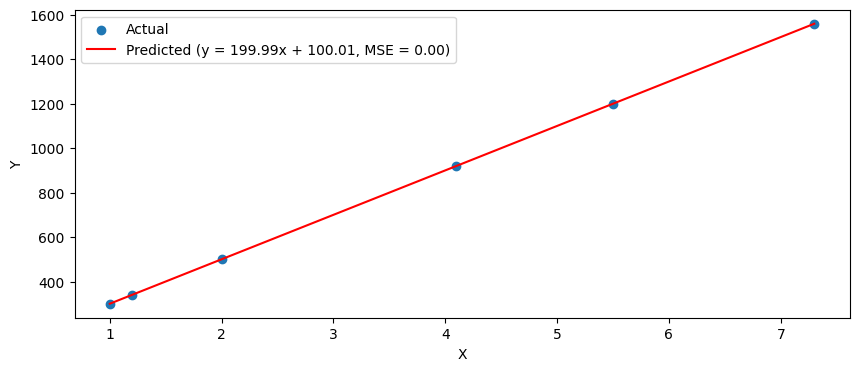

In [4]:
plot_scatter_with_best_fit(x_test, y_test, predict, w, b, size=[10,4])

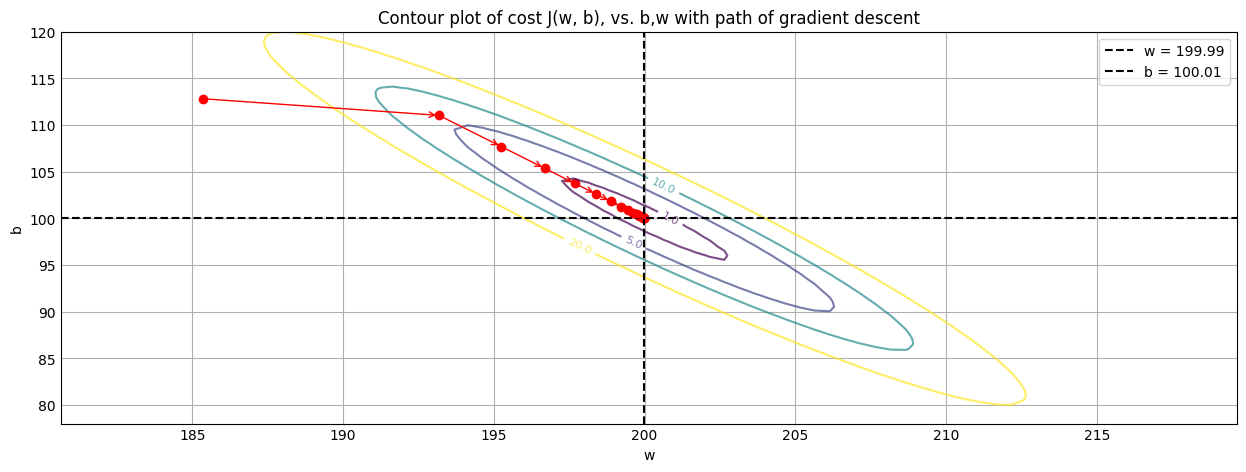

In [5]:
plot_contour(x_train, y_train, params_history)

## Large Dataset
Let's test out our model on the large dataset

In [6]:
data = pd.read_csv('archive/LR_1var_train.csv')

In [7]:
data = data.dropna()
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [8]:
x_train_vals = data['x'].values
y_train_vals = data['y'].values

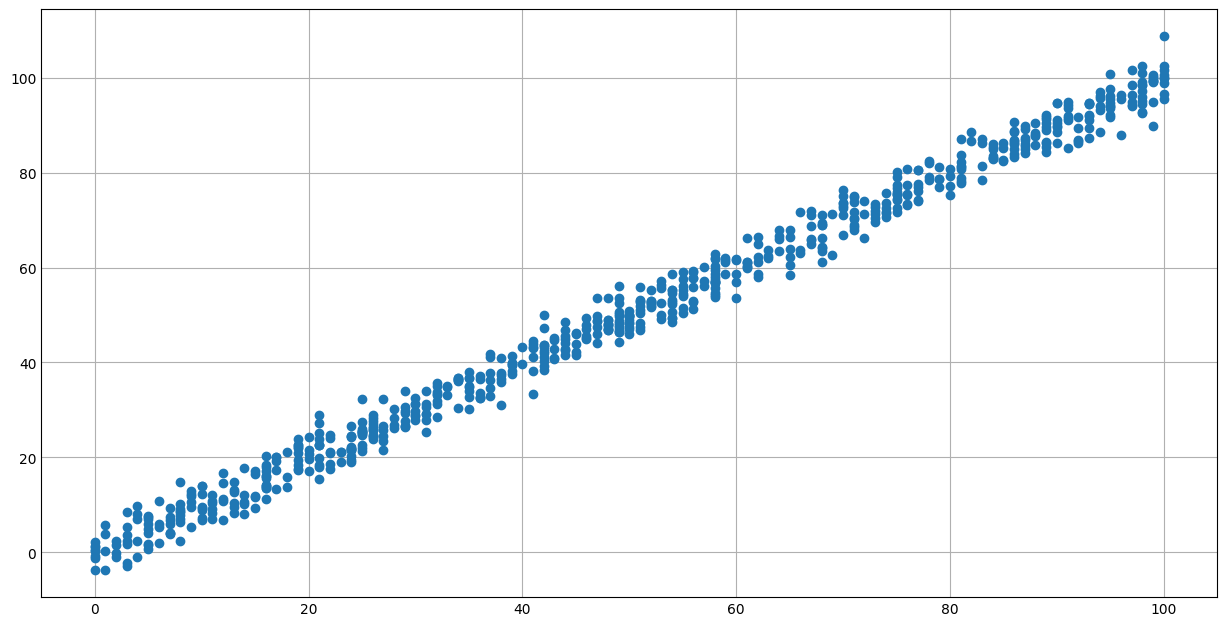

In [9]:
plot_scatter_data(x_train_vals, y_train_vals, size=[12, 6])

In [10]:
# Normalize x_train
x_normalized = (x_train_vals - np.mean(x_train_vals)) / np.std(x_train_vals)

# Initialize parameters
w_init = 10
b_init = 10

# Some gradient descent settings
tmp_alpha = 1.0e-2
iterations = 10000

w, b, cost_history, params_history = gradient_descent(x_normalized, y_train_vals, w_init, b_init, tmp_alpha, iterations)
print(f"(w,b) found by gradient descent: ({w:8.4f},{b:8.4f})")

(w,b) found by gradient descent: ( 28.9528, 49.9399)


### Predictions
Now that we have discovered the optimal values for the parameters $w$ and $b$, we can now use the model to predict housing values based on our learned parameters.

In [11]:
test_data = pd.read_csv('archive/LR_1var_test.csv')
test_data = test_data.dropna()
test_data

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [12]:
x_test_vals = test_data['x'].values
y_test_vals = test_data['y'].values

In [13]:
# Normalize x_test_vals using the mean and standard deviation of x_train_vals
x_test_normalized = (x_test_vals - np.mean(x_train_vals)) / np.std(x_train_vals)

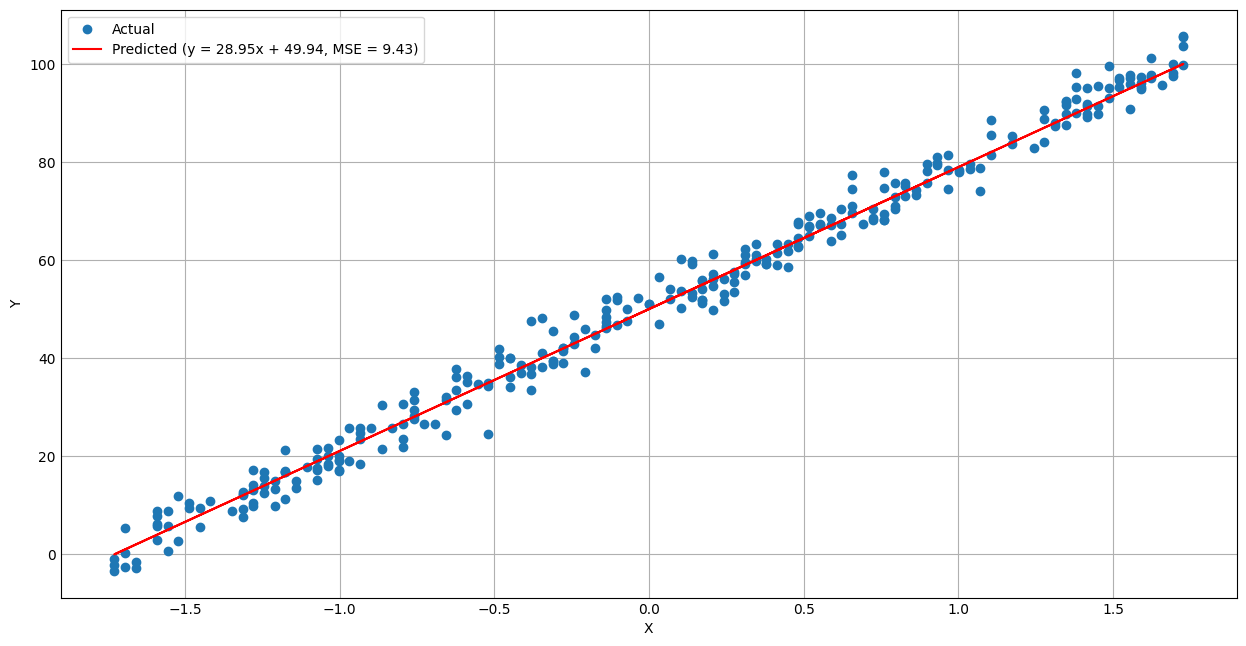

In [14]:
plot_scatter_with_best_fit(x_test_normalized, y_test_vals, predict, w, b, size=[12, 6])